In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tr21\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [6]:
ev_count=df['Model Year'].value_counts()

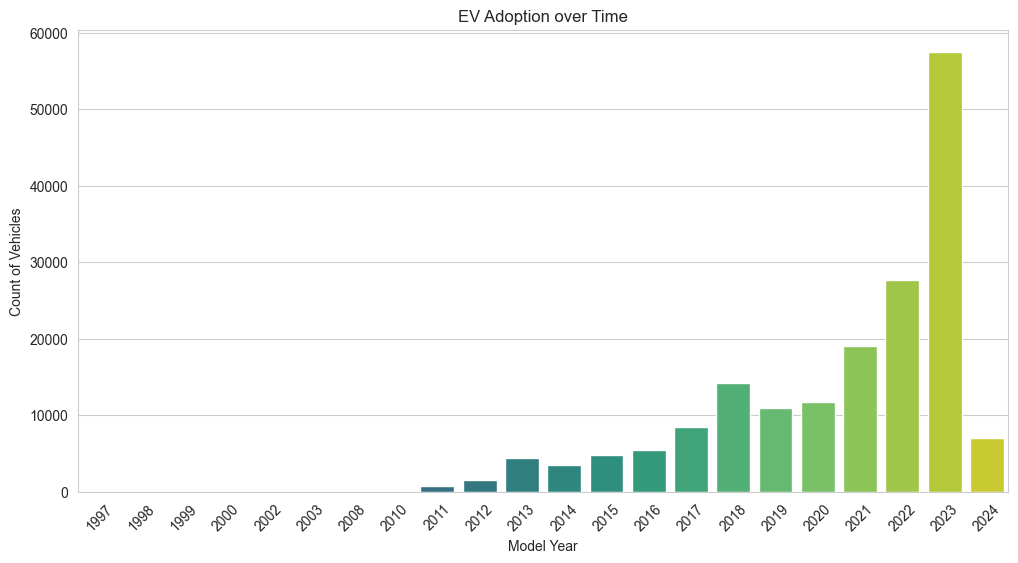

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x=ev_count.index,y=ev_count.values,palette='viridis')
plt.xlabel('Model Year')
plt.ylabel('Count of Vehicles')
plt.title('EV Adoption over Time')
plt.xticks(rotation=45)
plt.show()

In [8]:
top_4_countries=df['County'].value_counts().head(4).index
top_4_countries

Index(['King', 'Snohomish', 'Pierce', 'Clark'], dtype='object')

In [9]:
top_country_data=df[df['County'].isin(top_4_countries)]

In [10]:
ev_city_distribution=top_country_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='No.Of Vehicles Registered')
top_cities=ev_city_distribution.head(10)

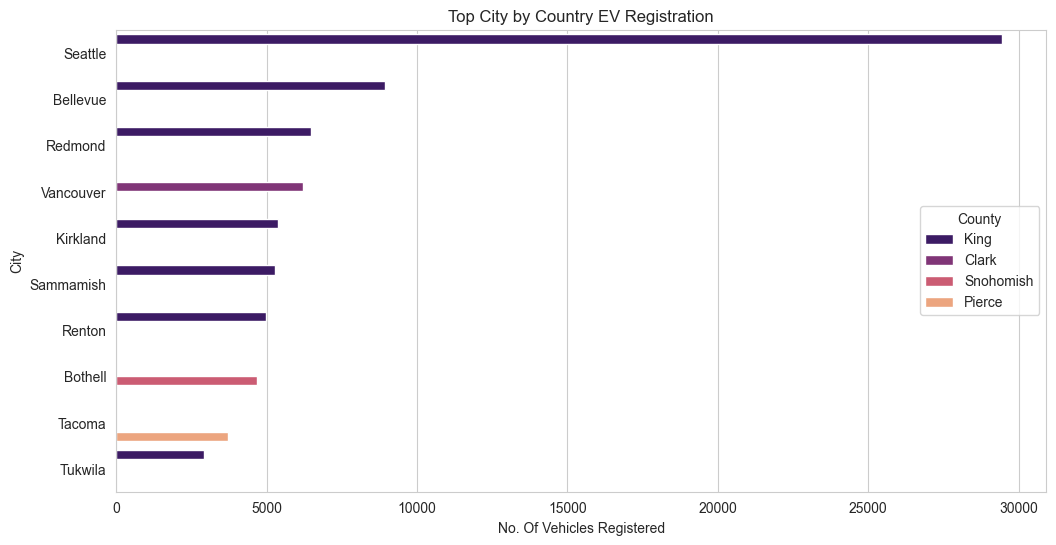

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x='No.Of Vehicles Registered',y='City',hue='County',data=top_cities,palette='magma')
plt.title('Top City by Country EV Registration')
plt.xlabel('No. Of Vehicles Registered')
plt.ylabel('City')
plt.show()

In [12]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: Electric Vehicle Type, dtype: int64

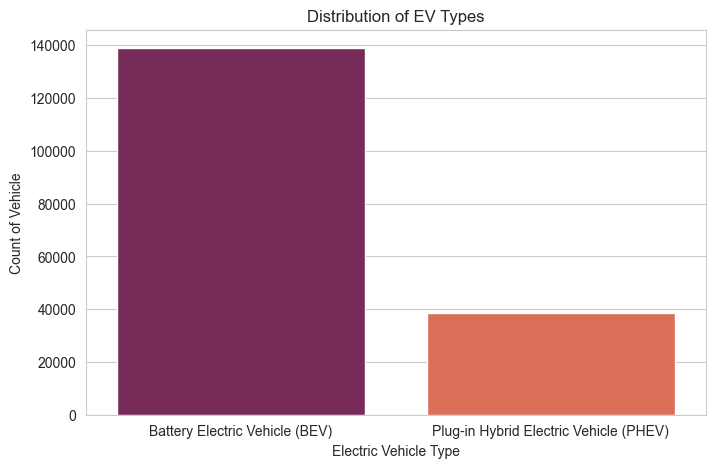

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Electric Vehicle Type'].value_counts().index,y=df['Electric Vehicle Type'].value_counts().values,palette='rocket')
plt.title('Distribution of EV Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count of Vehicle')
plt.show()

In [17]:
top_make=df['Make'].value_counts().head(4).index
top_make

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD'], dtype='object')

In [21]:
top_make_data=df[df['Make'].isin(top_make)]
top_make_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177860,1G1FX6S00J,Clallam,Sequim,WA,98382.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,24.0,347972607,POINT (-123.105015 48.08125),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [26]:
model_distribution=top_make_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='No of Vehicles').head(10)
model_distribution

,Make,Model,No of Vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,FORD,MUSTANG MACH-E,3316
8,FORD,FUSION,1782
9,CHEVROLET,BOLT EUV,1770


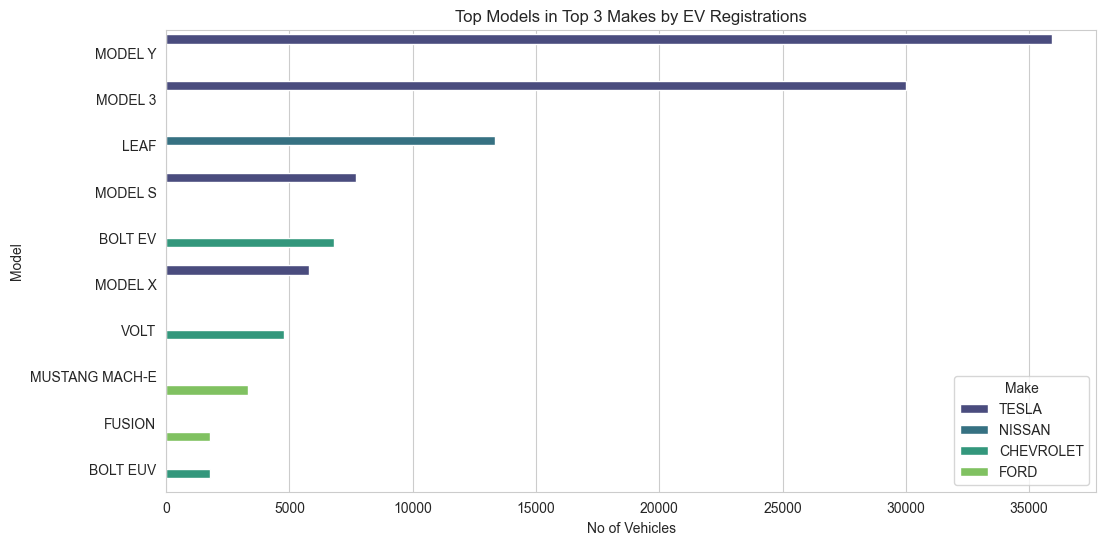

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x='No of Vehicles',y='Model',hue='Make',data=model_distribution,palette='viridis')
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.show()

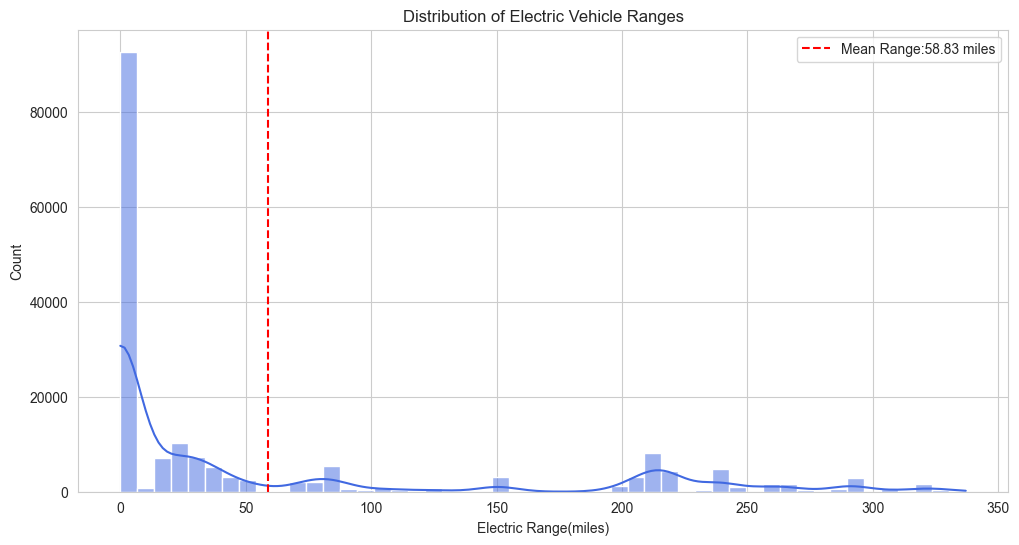

In [40]:
x=df['Electric Range'].mean()
plt.figure(figsize=(12,6))
sns.histplot(x='Electric Range',bins=50,data=df,kde=True,color='royalblue')
plt.axvline(df['Electric Range'].mean(),color='red',linestyle='--',label=f'Mean Range:{round(x,2)} miles')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range(miles)')
plt.legend()
plt.show()

In [41]:
avg_range_by_year=df.groupby('Model Year')['Electric Range'].mean().reset_index()
avg_range_by_year

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


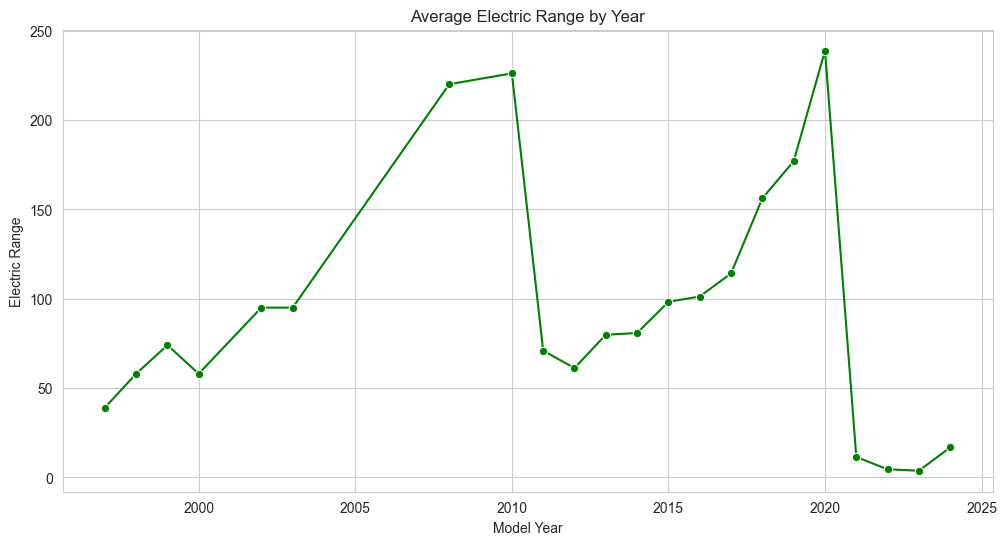

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',data=avg_range_by_year,marker='o',color='green')
plt.title('Average Electric Range by Year')
plt.show()

In [48]:
top_make_avg_er=top_make_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index().head(10)
top_make_avg_er

,Make,Model,Electric Range
0,TESLA,ROADSTER,234.673913
1,TESLA,MODEL S,176.794449
2,CHEVROLET,BOLT EV,154.857143
3,TESLA,MODEL X,137.192600
4,TESLA,MODEL 3,109.463028
5,NISSAN,LEAF,84.148742
6,CHEVROLET,SPARK,82.000000
7,FORD,FOCUS,78.987124
8,FORD,RANGER,64.153846
9,CHEVROLET,VOLT,45.365119


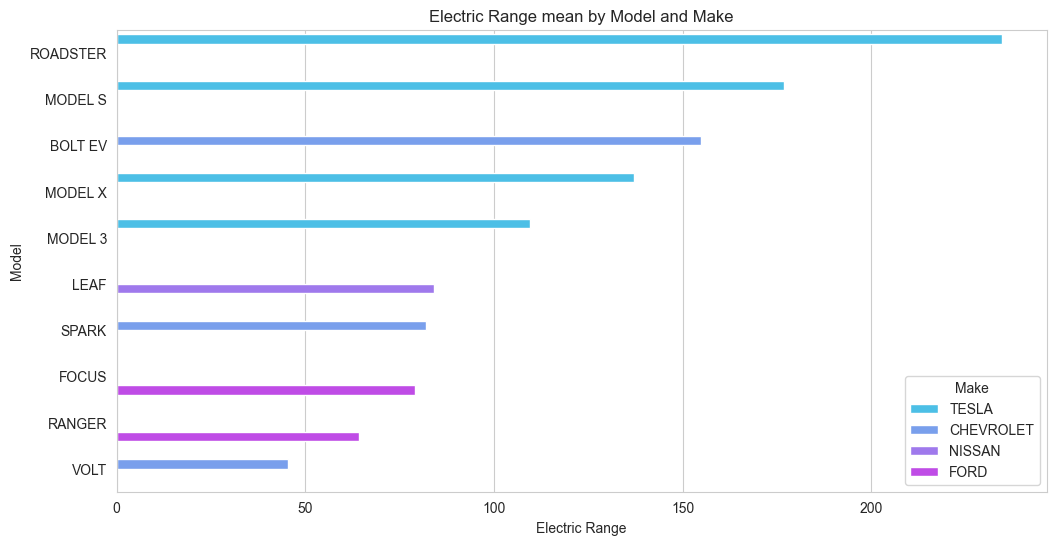

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(x='Electric Range',y='Model',hue='Make',palette='cool',data=top_make_avg_er)
plt.title('Electric Range mean by Model and Make')
plt.show()